##Atividades pedidas e importando bibliotecas

Tarefas:
1. Escolha uma base de dados e implemente um exemplo de como gerar resultados usando técnicas de uma regressão linear múltipla, considere dois modelos:  
    a) Modelo completo (todas as variáveis independentes)  
    b) Modelo reduzido (elimine aquelas variáveis que não contribuem   significantemente com o modelo)  
2. Calcule:  
    a) Os parâmetros Beta do modelo de regressão múltipla.  
    b) SST = Total Sum of Squares.  
    c) SSE = Explained Sum of Squares.  
    d) SSR = Residual Sum of Squares.  
3. Calcule R2 e R2 ajustado e também o  teste-F para os dois modelos.
4. Mostre os gráficos de resíduos para verificação da Homocesdaticidade do Modelo.
5. Mostre a tabela com a análise de resultados OLS - Ordinary Least Squares estimators. 


In [100]:
#importanto bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

##Modelo completo da regressão

Utilizarei o dataset, onde analisarei quantidas de vendas de algumas empresas em relação ao seu investimento em algumas plataformas de marketing, youtube,  facebook e jornal.

In [143]:
#lendo o dataset
df = pd.read_csv("Marketing_Data.csv", header=0)
print(df.shape)

#Separando as variáveis dependentes e independentes do nosso modelo
x = df[['youtube', 'facebook', 'newspaper']]
y=df.loc[:,'sales']

(171, 4)


Para o modelo completo utilizaremos todas as variáveis independentes:


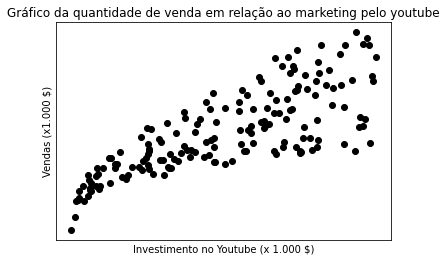

In [144]:
#Gráfico em relação ao youtube
plt.scatter(x.loc[:,'youtube'].values, y.values,  color='black')
plt.xticks(())
plt.yticks(())
plt.title("Gráfico da quantidade de venda em relação ao marketing pelo youtube")
plt.xlabel("Investimento no Youtube (x 1.000 $)")
plt.ylabel("Vendas (x1.000 $)")
plt.show()

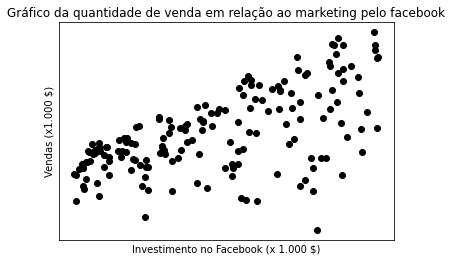

In [145]:
#Gráfico em relação ao facebook
plt.scatter(x.loc[:,'facebook'].values, y.values,  color='black')
plt.xticks(())
plt.yticks(())
plt.title("Gráfico da quantidade de venda em relação ao marketing pelo facebook")
plt.xlabel("Investimento no Facebook (x 1.000 $)")
plt.ylabel("Vendas (x1.000 $)")
plt.show()

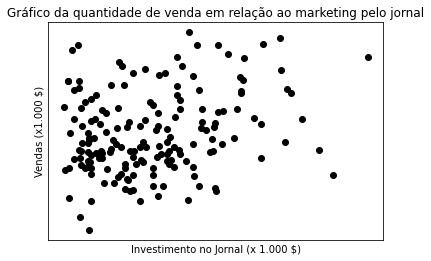

In [146]:
#Gráfico em relação a jornais
plt.scatter(x.loc[:,'newspaper'].values, y.values,  color='black')
plt.xticks(())
plt.yticks(())
plt.title("Gráfico da quantidade de venda em relação ao marketing pelo jornal")
plt.xlabel("Investimento no Jornal (x 1.000 $)")
plt.ylabel("Vendas (x1.000 $)")
plt.show()

Vamos separar o dataset entre amostras de treino e teste

In [147]:
#Separando entre dados de teste e dados de treino
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(128, 3) (128,) (43, 3) (43,)


Regressão Linear utilizando a biblioteca do SKLearn

In [148]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fazendo a predição de dados utilizando a regressão encontrada pelo SKLearn

In [149]:
y_pred = regr.predict(x_test)
print(y_pred)


[28.8680674  17.44004875 11.75546385 12.19644915 18.77806559 11.45080364
  7.72229397 27.37737538 27.8610771  27.80507247 14.84078911 12.9021189
 18.82146369 20.73514649  8.36239278 24.20421184 11.77377733  6.34600428
 21.62199909 16.38431325 13.73288036 19.87295157 11.95576313 24.8454641
 16.42374933 23.36552633 28.80503352  7.3412934  12.6543658  14.12565597
  9.43691865 25.39347979  7.25451756  5.33356212 11.31670753  6.34435953
 28.41810681 10.36504323 17.12768135 11.89773576 15.80643794 20.58526896
 15.60744004]


Regressão Linear utilizando o StatsModel

In [150]:
x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train.astype(float), x_train.astype(float)).fit()

Fazendo a predição de dados utilizando a regressão encontrada pelo StatsModel

In [151]:
y_pred1 =  model.predict(x_train)
x_test = sm.add_constant(x_test)
y_pred2 =  model.predict(x_test) # predict out of sample
print(y_pred2)

154    28.868067
54     17.440049
109    11.755464
53     12.196449
89     18.778066
50     11.450804
88      7.722294
32     27.377375
118    27.861077
72     27.805072
67     14.840789
97     12.902119
58     18.821464
134    20.735146
78      8.362393
25     24.204212
61     11.773777
166     6.346004
76     21.621999
71     16.384313
51     13.732880
33     19.872952
9      11.955763
108    24.845464
83     16.423749
80     23.365526
69     28.805034
77      7.341293
42     12.654366
59     14.125656
100     9.436919
64     25.393480
160     7.254518
62      5.333562
111    11.316708
126     6.344360
169    28.418107
27     10.365043
142    17.127681
122    11.897736
34     15.806438
45     20.585269
86     15.607440
dtype: float64


Agora vamos calcular SST, SSE, SSR, R² e R² ajustado:

In [152]:
ssr = 0
y_test = y_test.values
y_train = y_train.values
y_pred1 = y_pred1.values
y_pred2 = y_pred2.values
residues = []

for j in range(y_train.shape[0]):
  ssr += (y_train[j] - y_pred1[j])**2
  residues.append((y_train[j] - y_pred1[j]))


for i in range(len(y_test)):
  ssr += (y_test[i] - y_pred2[i])**2
  residues.append((y_test[i] - y_pred2[i]))


print("SSR: ", ssr)

x = x.values
y = y.values

aux = 0
for i in range(len(x)):
  aux += (y[i] - np.mean(y))**2

sst = np.sum(aux)
sse = sst-ssr

print("SSE: ", sse)

print("SST: ", sst)

print("coeficiente de determinação: ",sse/sst)


r2ajus = 1-(ssr*(x.shape[0]-1))/(sst*(x.shape[0]-x.shape[1]-1))
print("Coeficiente de determinção ajustado: ", r2ajus)


SSR:  682.2430565964711
SSE:  6096.382796035108
SST:  6778.62585263158
coeficiente de determinação:  0.8993537818093894
Coeficiente de determinção ajustado:  0.8975457659137498


Por fim, printando todos os dados pedidos:

In [153]:
print("R-squared: ", model.rsquared)
print("F-statisc: ", model.fvalue, "\n")

print("Dados retirados pelo SKLearn: ")
print("Beta 0, 1, 2, 3: ", regr.intercept_, regr.coef_)
print("Coeficiente de determinação: ", r2_score(y_test, y_pred),)
print("Erro quadrático médio: ", mean_squared_error(y_test, y_pred), "\n")

print("Dados retirados pelo StatsModel: ")
print("Beta 0, 1, 2, 3 (Coef):\n", model.params)



R-squared:  0.8817854405719008
F-statisc:  308.3133898223977 

Dados retirados pelo SKLearn: 
Beta 0, 1, 2, 3:  3.431024731137283 [0.04467934 0.19323491 0.00053837]
Coeficiente de determinação:  0.9340766877952198
Erro quadrático médio:  3.486300507780293 

Dados retirados pelo StatsModel: 
Beta 0, 1, 2, 3 (Coef):
 const        3.431025
youtube      0.044679
facebook     0.193235
newspaper    0.000538
dtype: float64


Tabela de análise OLS:

In [154]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     308.3
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           2.69e-57
Time:                        14:43:56   Log-Likelihood:                -272.84
No. Observations:                 128   AIC:                             553.7
Df Residuals:                     124   BIC:                             565.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4310      0.516      6.644      0.0

Gráficos de resíduos

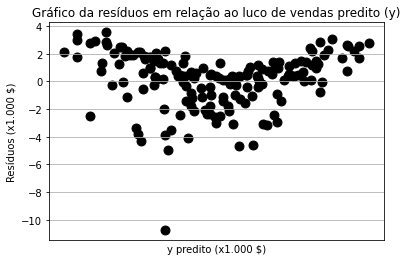

In [155]:
#Gráfico de resíduos para estudar a homocedasticidade 
predicted = np.concatenate([y_pred1, y_pred2], axis=0)
plt.scatter(predicted,  residues,  color='black', s=80)
plt.xticks([0])
plt.title("Gráfico da resíduos em relação ao luco de vendas predito (y)")
plt.xlabel("y predito (x1.000 $)")
plt.ylabel("Resíduos (x1.000 $)")
plt.grid(True)
plt.show()

##Modelo reduzido

É possível perceber pelos valores de t-student que a variável que pior influência o modelo é a do jornal, portanto vamos retirá-la e aplicar os mesmos procedimentos para o modelo reduzido

Relendo o dataset e separando as variáveis que usaremos:

In [190]:
#relendo o dataset
df = pd.read_csv("Marketing_Data.csv", header=0)
print(df.shape)

#Separando as variáveis dependentes e independentes do nosso modelo
x = df[['youtube', 'facebook']]
y=df.loc[:,'sales']

#Separando entre dados de teste e dados de treino
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(171, 4)
(128, 2) (128,) (43, 2) (43,)


Regressão Linear usando SKLearn:

In [191]:
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predizendo dados com SKLearn:

In [192]:
y_pred = regr.predict(x_test)
print(y_pred)

[24.22887533 12.32458762 13.05952066 20.35671714 16.8184825  19.65561221
 14.8563299  10.20451801 29.02717254 11.89914222 11.09402646  8.8494179
 15.27442403  9.48465836 26.19921002 18.41931891 18.72817252 12.17779518
 16.15133028 14.49268834 19.22822776 15.50471752 12.23298513  9.28398943
 18.41822203 18.39972349 14.3120055  16.77443982 20.22982869 28.6346438
 11.50439846  9.76798763 16.56891061 20.81007453 10.63679243 11.18131216
 16.8874126  12.23177501 17.7745928   7.81902323 23.3046145  26.50324294
  9.93320641]


Regressão Linear com o StatsModel: 

In [194]:
x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train.astype(float), x_train.astype(float)).fit()

Predizendo dados com StatsModel: 


In [195]:
y_pred1 =  model.predict(x_train)
x_test = sm.add_constant(x_test)
y_pred2 =  model.predict(x_test) # predict out of sample
print(y_pred2)

24     24.228875
122    12.324588
101    13.059521
6      20.356717
152    16.818483
19     19.655612
46     14.856330
20     10.204518
69     29.027173
50     11.899142
49     11.094026
78      8.849418
67     15.274424
3       9.484658
18     26.199210
94     18.419319
102    18.728173
109    12.177795
138    16.151330
59     14.492688
8      19.228228
168    15.504718
128    12.232985
141     9.283989
16     18.418222
117    18.399723
57     14.312005
71     16.774440
33     20.229829
169    28.634644
22     11.504398
36      9.767988
145    16.568911
139    20.810075
103    10.636792
15     11.181312
14     16.887413
61     12.231775
54     17.774593
77      7.819023
104    23.304615
29     26.503243
92      9.933206
dtype: float64


Agora vamos calcular SST, SSE, SSR, R² e R² ajustado:

In [196]:
ssr = 0
y_test = y_test.values
y_train = y_train.values
y_pred1 = y_pred1.values
y_pred2 = y_pred2.values
residues = []

for j in range(y_train.shape[0]):
  ssr += (y_train[j] - y_pred1[j])**2
  residues.append((y_train[j] - y_pred1[j]))


for i in range(len(y_test)):
  ssr += (y_test[i] - y_pred2[i])**2
  residues.append((y_test[i] - y_pred2[i]))


print("SSR: ", ssr)

x = x.values
y = y.values

aux = 0
for i in range(len(x)):
  aux += (y[i] - np.mean(y))**2

sst = np.sum(aux)
sse = sst-ssr

print("SSE: ", sse)

print("SST: ", sst)

print("coeficiente de determinação: ",sse/sst)


r2ajus = 1-(ssr*(x.shape[0]-1))/(sst*(x.shape[0]-x.shape[1]-1))
print("Coeficiente de determinção ajustado: ", r2ajus)

SSR:  685.3895931479003
SSE:  6093.2362594836795
SST:  6778.62585263158
coeficiente de determinação:  0.8988895967931583
Coeficiente de determinção ajustado:  0.8976859015168863


Por fim, printando todos os dados pedidos:

In [197]:
print("R-squared: ", model.rsquared)
print("F-statisc: ", model.fvalue, "\n")

print("Dados retirados pelo SKLearn: ")
print("Beta 0, 1, 2, 3: ", regr.intercept_, regr.coef_)
print("Coeficiente de determinação: ", r2_score(y_test, y_pred),)
print("Erro quadrático médio: ", mean_squared_error(y_test, y_pred), "\n")

print("Dados retirados pelo StatsModel: ")
print("Beta 0, 1, 2, 3 (Coef):\n", model.params)

R-squared:  0.9222640008428022
F-statisc:  741.5033019143735 

Dados retirados pelo SKLearn: 
Beta 0, 1, 2, 3:  3.9790527751235203 [0.04426489 0.19030483]
Coeficiente de determinação:  0.8189181924536908
Erro quadrático médio:  6.9531484162264485 

Dados retirados pelo StatsModel: 
Beta 0, 1, 2, 3 (Coef):
 const       3.979053
youtube     0.044265
facebook    0.190305
dtype: float64


Tabela de análise OLS:

In [198]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     741.5
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           4.61e-70
Time:                        14:47:39   Log-Likelihood:                -252.33
No. Observations:                 128   AIC:                             510.7
Df Residuals:                     125   BIC:                             519.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9791      0.384     10.351      0.0


Gráficos de resíduos

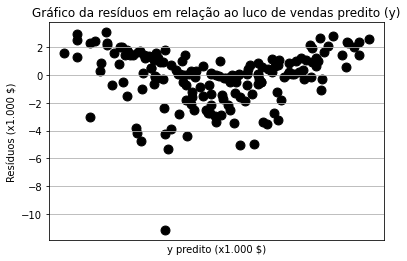

In [199]:
#Gráfico de resíduos para estudar a homocedasticidade 
predicted = np.concatenate([y_pred1, y_pred2], axis=0)
plt.scatter(predicted,  residues,  color='black', s=80)
plt.xticks([0])
plt.title("Gráfico da resíduos em relação ao luco de vendas predito (y)")
plt.xlabel("y predito (x1.000 $)")
plt.ylabel("Resíduos (x1.000 $)")
plt.grid(True)
plt.show()

##Conclusões entre os dois modelos

Pelo gráfico de resíduos os dados não possuem homocedasticidade.

Podemos perceber que existe uma melhora no modelo reduzido em comparação ao anterior, pois temos:  


1.   Aumento no R² e R² ajustado.
2.   Aumento no beta do "Facebook" após retirar o "Newspaper"
3.   Valores de T-student mais confiáveis
4.   Maior valor de F-statistic  

Mas a mudança não é tão notável pois o dataset já possuía uma pouca quantidade de atributos. Seria possível ver uma melhora mais significativa com algum outro dataset